In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 

dados = pd.read_excel("dataset_dengue.xlsx") # importando os dados

dados1 = dados.drop(columns = ["data"], axis = 1) # Exclui a coluna "data"

#dados1

In [2]:
# Inserir uma coluna "meses" para usar como referencia de data, com os mesmos valores que o index
meses = []
for i in dados1.index:
    meses.append(i)

dados2 = dados1.copy()
dados2.insert(5, "meses", meses, True)

df = dados2

#dados2

### Gráfico de distibuição dos casos

array([[<AxesSubplot:title={'center':'casos-confirmados'}>]], dtype=object)

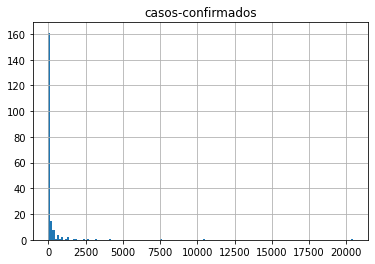

In [3]:
TARGET = ["casos-confirmados"]
df[TARGET].hist(bins=150)

### Categorização

In [4]:
# Separa o número de casos

logic = df["casos-confirmados"] <= 20
print(len(df.loc[logic]),'Casos raros/isolados')
logic = (df["casos-confirmados"] > 20) & (df["casos-confirmados"] <= 50)
print(len(df.loc[logic]),'Pouquissimos casos')
logic = (df["casos-confirmados"] > 50) & (df["casos-confirmados"] <= 250)
print(len(df.loc[logic]),'Poucos casos')
logic = (df["casos-confirmados"] > 250) & (df["casos-confirmados"] <= 1000)
print(len(df.loc[logic]),'Numero medio de casos')
logic = (df["casos-confirmados"] > 1000) & (df["casos-confirmados"] <= 2500)
print(len(df.loc[logic]),'Muitos casos')
logic = (df["casos-confirmados"] > 2500)
print(len(df.loc[logic]),'Surtos de dengue')

104 Casos raros/isolados
37 Pouquissimos casos
33 Poucos casos
18 Numero medio de casos
6 Muitos casos
6 Surtos de dengue


In [5]:
# Adiciona uma coluna com a categorização ao dataset

df['casos-categórico'] = None

logic = df["casos-confirmados"] <= 20
df.loc[logic, 'casos-categórico'] ='Casos raros/isolados'
logic = (df["casos-confirmados"] > 20) & (df["casos-confirmados"] <= 50)
df.loc[logic, 'casos-categórico'] = 'Pouquissimos casos'
logic = (df["casos-confirmados"] > 50) & (df["casos-confirmados"] <= 250)
df.loc[logic, 'casos-categórico'] = 'Poucos casos'
logic = (df["casos-confirmados"] > 250) & (df["casos-confirmados"] <= 1000)
df.loc[logic, 'casos-categórico'] = 'Numero medio de casos'
logic = (df["casos-confirmados"] > 1000)  & (df["casos-confirmados"] <= 2500)
df.loc[logic, 'casos-categórico'] = 'Muitos casos'
logic = (df["casos-confirmados"] > 2500)  
df.loc[logic, 'casos-categórico'] = 'Surtos de dengue'
print(df)

     casos-confirmados  chuva  temperatura-media  temperatura-mininima  \
0                  237  179.2               25.7                  20.2   
1                  331  226.3               25.1                  20.0   
2                  562  149.1               24.8                  22.4   
3                  187   46.4               22.7                  18.1   
4                   32   88.3               19.2                  15.7   
..                 ...    ...                ...                   ...   
199                 55   12.2               20.6                  13.1   
200                 40   69.2               23.0                  18.6   
201                 40   15.6               24.7                  17.2   
202                 57  154.8               25.0                  22.1   
203                 37  232.8               24.9                  21.3   

     temperatura-maxima  meses       casos-categórico  
0                  28.1      0           Poucos casos  

In [6]:
# Converte dados categoricos em numéricos 

conversao = {
    "Casos raros/isolados": 1,
    "Pouquissimos casos": 2,
    "Poucos casos": 3,
    "Numero medio de casos": 4,
    "Muitos casos": 5,
    "Surtos de dengue": 6,
}

df["cc"] = df["casos-categórico"].map(conversao)

print(df)

     casos-confirmados  chuva  temperatura-media  temperatura-mininima  \
0                  237  179.2               25.7                  20.2   
1                  331  226.3               25.1                  20.0   
2                  562  149.1               24.8                  22.4   
3                  187   46.4               22.7                  18.1   
4                   32   88.3               19.2                  15.7   
..                 ...    ...                ...                   ...   
199                 55   12.2               20.6                  13.1   
200                 40   69.2               23.0                  18.6   
201                 40   15.6               24.7                  17.2   
202                 57  154.8               25.0                  22.1   
203                 37  232.8               24.9                  21.3   

     temperatura-maxima  meses       casos-categórico  cc  
0                  28.1      0           Poucos cas

### Treinando um novo modelo

In [7]:
# Definir datasets de treino e teste, e hiperparâmetros gerais para todos os teste   
import seaborn as sns
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.15 # quantidade de dados usados para o teste (15%)
SEMENTE_ALEATORIA = 469
FEATURES = ["chuva", "temperatura-media", "temperatura-mininima", "temperatura-maxima", "meses"]
TARGET = ["cc"]


indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [8]:
from sklearn.tree import DecisionTreeClassifier

# cria o modelo
modelo_dt = DecisionTreeClassifier(
    random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao)


[3 1 1 3 6 4 1 1 1 1 2 1 2 1 1 1 1 1 1 4 4 1 4 1 1 4 3 1 1 3 3]


In [9]:
# Performace do modelo 

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Accuracy: 0.4838709677419355


### Avaliação dos hiperparâmetros

In [10]:
# Avalia, automaticamnte, os melhores hiperparâmetros
from sklearn.model_selection import GridSearchCV

param_grid = { 
    "max_leaf_nodes":[None, 3, 5, 10],
    'max_depth' : [4,6,8,10,12,14,16],
}
CV_rfc = GridSearchCV(estimator=modelo_dt, param_grid=param_grid, cv= 5, n_jobs=8)
CV_rfc.fit(X_treino, y_treino)

print(CV_rfc.best_params_)
best_params = CV_rfc.best_params_

{'max_depth': 4, 'max_leaf_nodes': 3}


[3 1 1 3 6 4 1 1 1 1 2 1 2 1 1 1 1 1 1 4 4 1 4 1 1 4 3 1 1 3 3]
O RMSE do modelo árvore de decisão foi de 1.3319885691653277.
Accuracy: 0.4838709677419355


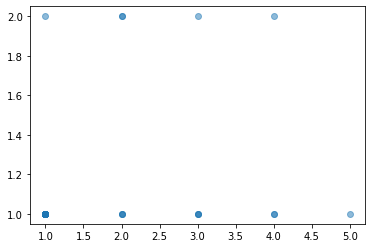

In [11]:
# Treinando novamente o modelo

modelo_dt = DecisionTreeClassifier(
    max_leaf_nodes=3,
    max_depth=4,
    random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
y_verdadeiro = (y_teste)
y_previsao = modelo_dt.predict(X_teste)
print(previsao)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo árvore de decisão foi de {RMSE}.")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

O RMSE do modelo floresta aleatória foi de 1.205765718430382.
Accuracy: 0.4838709677419355


C:\Users\HEITOR~1\AppData\Local\Temp/ipykernel_7800/983282173.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_rf.fit(X_treino, y_treino)


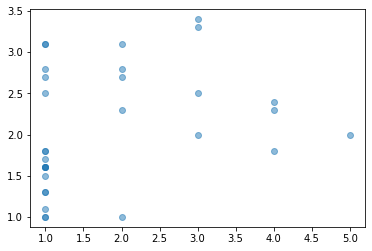

In [12]:
from sklearn.ensemble import RandomForestRegressor

# cria o modelo
modelo_rf = RandomForestRegressor(n_estimators=10, random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo floresta aleatória foi de {RMSE}.")

plt.plot(y_verdadeiro, y_previsao, ls="none", marker="o", alpha=0.5)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

### Matriz de confusão

Text(0.5, 15.0, 'Predicted label')

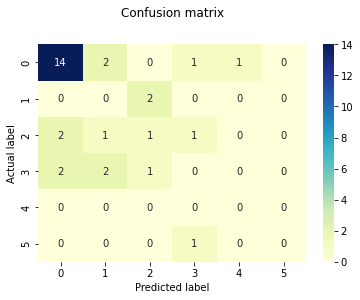

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(previsao, y_teste)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')


plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Bloco 3

## Análise de Componente Principal (PCA)

In [14]:
# Bibliotecas
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
# Normalizador 
# Para esta tranformação, os dados precisam estar normalizados 

X = df.reindex(FEATURES, axis=1)
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)
#X_norm

In [16]:
# Transformação PCA
pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

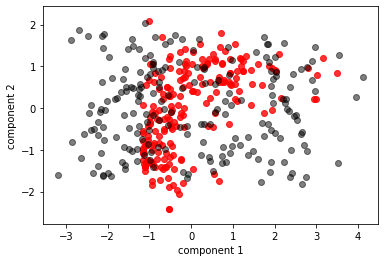

In [17]:
# Gráfico

import matplotlib.patches as patches
import matplotlib.colors as colors

#X_new = pca.inverse_transform(X_pca)
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, color="red")
#plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, color="black")
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

Análise dos resultados do gráfico
    
O gráfico apresenta uma solução bidemensional para os resultados do normalizador e da PCA, com as cores vermelho e preto. Em primeira análise, os dados foram espalhados maximizando a variância. Não há uma relação clara, utilizando somente essse gráfico.

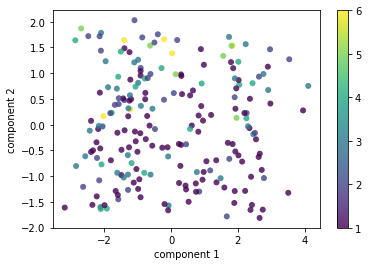

In [18]:
# Gráfico disperso, o padrão de cores corresponde aos classificadores
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.8, c=df["cc"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Análise dos resultados do gráfico
    
Esse novo gráfico agrupa os dados por cores, em um degradê de roxo à amarelo. Contudo, não é possível perceber relação entre os grupos formados. Um dado roxo está completamente distante de outro roxo, e todos parecem espalhados, sobrepondo a área azul, por exemplo. Então, nenhuma conclusão pode ser tirada, salvo pela certeza de que essa não é a melhor transformação para o tipo de feature apresentado.

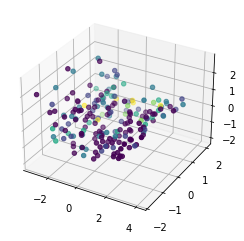

In [19]:
# Versão 3D

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df["cc"].values)

In [20]:
'''# Peso das Features

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings
'''

'# Peso das Features\n\ncomponent_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]\nX_pca = pd.DataFrame(X_pca, columns=component_names)\nX_pca.head()\n\nloadings = pd.DataFrame(\n    pca.components_.T,  # transpose the matrix of loadings\n    columns=component_names,  # so the columns are the principal components\n    index=X.columns,  # and the rows are the original features\n)\nloadings\n'

array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

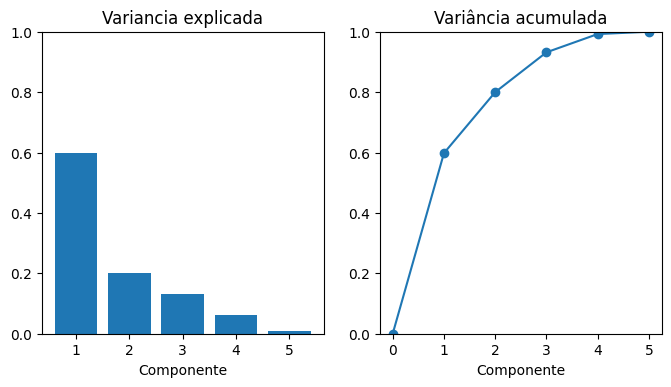

In [21]:
# Análise da variancia 

def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)


Análise dos resultados do gráfico
    
A variância é grande em todos os casos, como já era esperado. Tudo dentro do esperado. 

### K-Means 

In [22]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [23]:
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [24]:
n_clusters=3  #Define três clusters

kmeans = KMeans(            #Inicializando o K-Means
    n_clusters=n_clusters,  #Definindo número de clusters
    init='random',          #Inicialização randomica, aqui você pode tentar o K-Means++ :)
    n_init=10,              #Número de inicializações
    max_iter=300,           #Número máximo de iterações
    tol=1e-04,              #Tolerância para variação da coordenada dos centróides para definir a convergência
    random_state=0          #Define a semente aleatória
)

y_kmeans = kmeans.fit_predict(X_norm) #Fita o K-Means

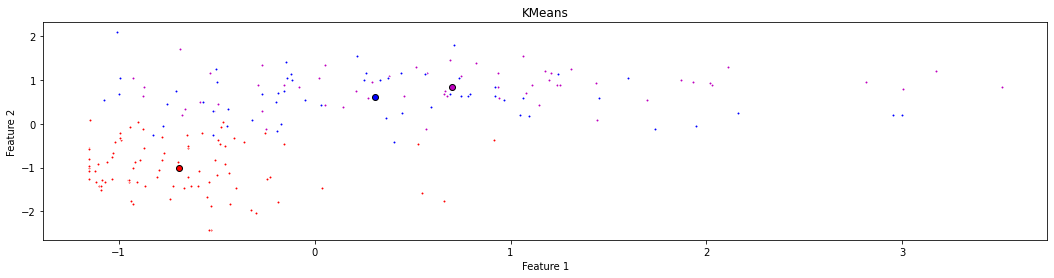

In [25]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

centroids = kmeans.cluster_centers_ #Extraindo os centróides do K-Means
labels = pairwise_distances_argmin(X_norm, centroids) #Usando a função pairwise_distances_argmin 
                                                      #para dar os labels aos clusters
colors = ["r", "m", "b", "y", "k"] #Definindo a paleta de cores

fig = plt.figure(figsize=(18, 4)) #Definindo a figura e seu tamanho
ax = fig.add_subplot()             #Criando um subplot

for k, col in zip(range(n_clusters), colors): #Desempacotando a lista de número de cluster e cores.
    my_members = labels == k  #Define quais pontos são membros de cada cluster
    #print(my_members)        #Descomente essa linha para entender como se comporta a variável my_members
    cluster_center = centroids[k] #Pega as coordenadas do centróide k
    ax.plot(                      #Plota os pontos do centróide k
        X_norm[my_members, 0],    #Coordenada do eixo-x
        X_norm[my_members, 1],    #Coordenada do eixo-y
        markerfacecolor=col,      #Define a cor do ponto
        marker=".",               #Define o estilo do ponto
        markeredgecolor="w",      #Define a cor de contorno do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )
    ax.plot(                      #Plotando os centróides
        cluster_center[0],        #Coordenada x do centróide
        cluster_center[1],        #Coordenada y do centróide
        marker="o",               #Define estilo do ponto
        markerfacecolor=col,      #Define cor do ponto
        markeredgecolor="k",      #Define a cor do contorno do ponto
        markersize=6,             #Define o tamanho do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )

ax.set_title("KMeans")  #Título do gráfico
plt.xlabel('Feature 1') #Nome da componente x
plt.ylabel('Feature 2') #Nome da componente y

plt.show() #Mostrar o gráfico

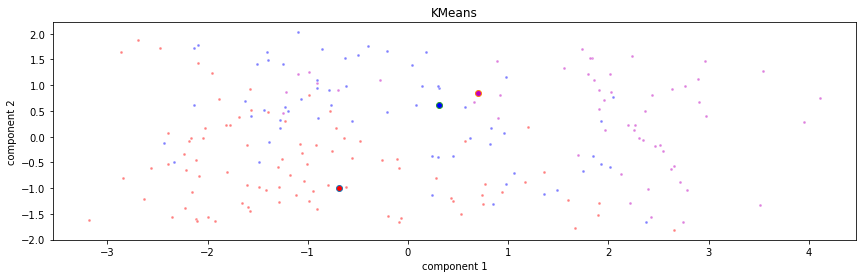

In [26]:
centroids = kmeans.cluster_centers_
labels = pairwise_distances_argmin(X_pca, centroids)
colors = ["r", "m", "b", "y", "k"]

fig = plt.figure(figsize=(14.4, 4))
ax = fig.add_subplot()

for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = centroids[k]
    ax.plot(
        X_pca[my_members, 0],
        X_pca[my_members, 1],
        "w", 
        markerfacecolor=col,
        marker=".",
        alpha = 0.5,
        linewidth=0)
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markersize=6,
        alpha = 1.0,
        linewidth=0
    )

ax.set_title("KMeans")
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

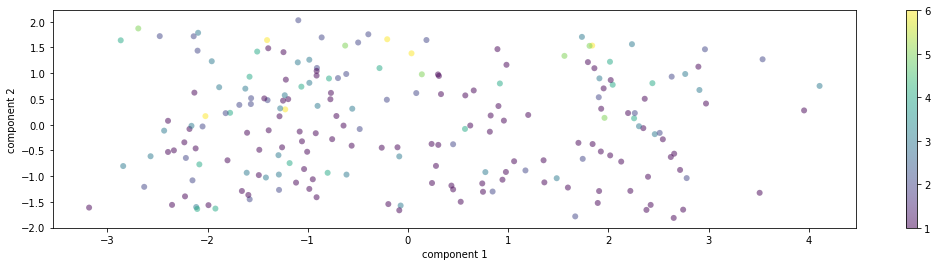

In [27]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df["cc"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

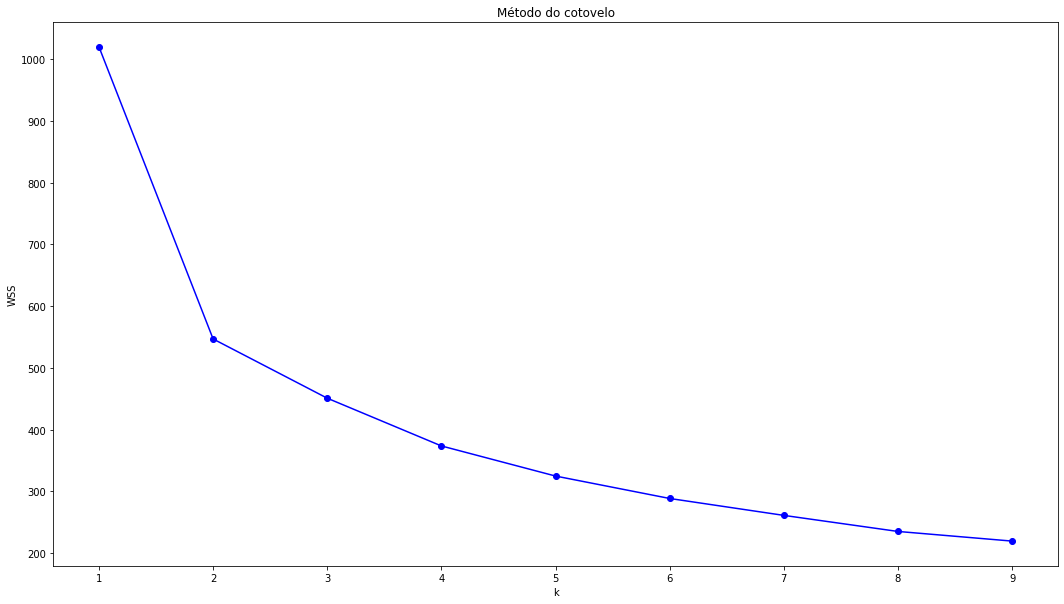

In [28]:
WSS = []  #Inicia uma lista vazia, para acumularmos valores.

for k in range(1,10): #Vamos fazer para 1 a 9 clusters.
    kmeans = KMeans(  #Inicializa o K-Means, como já explicado antes
        n_clusters=k, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )
    y_kmeans = kmeans.fit_predict(X_pca) #Fita o K-Means
    WSS.append(kmeans.inertia_)          #Obtem a WSS e acumula na lista inicializada 
    
plt.figure(figsize=(18,10))              #Define o tamanho da figura
plt.plot(range(1,10), WSS, '-bo')        #Define o plot
plt.xlabel('k')                          #Nome da coordenada x
plt.ylabel('WSS')                        #Nome da coordenada y
plt.title('Método do cotovelo')          #Título do gráfico
plt.show()                               #Mostra o gráfico

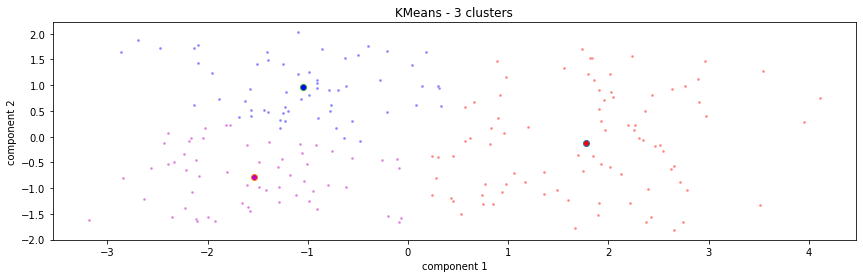

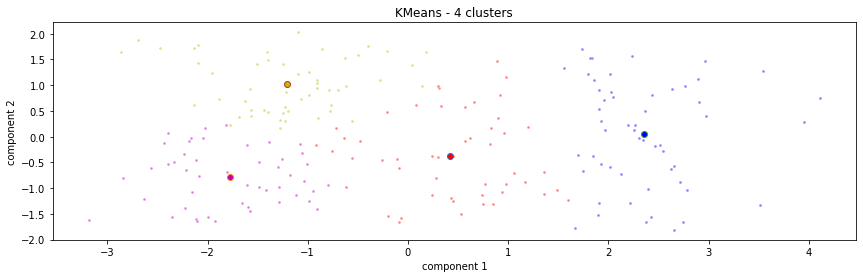

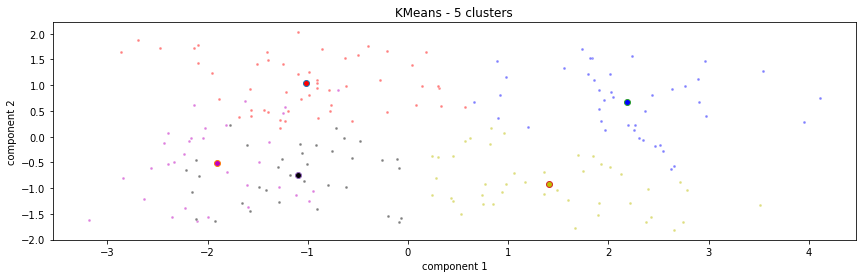

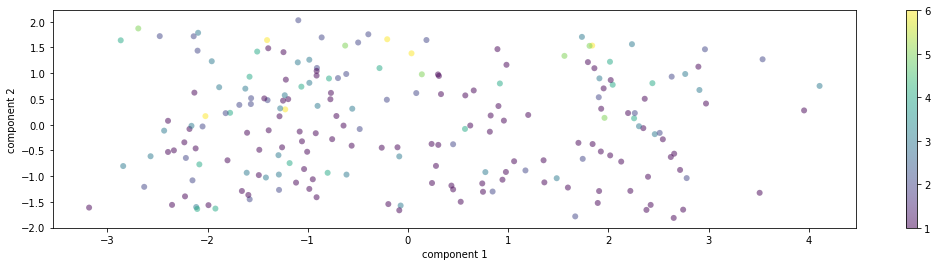

In [29]:
for numberofclusters in range(3,6):

    n_clusters=numberofclusters

    kmeans = KMeans(
        n_clusters=n_clusters, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )

    y_kmeans = kmeans.fit_predict(X_pca)

    centroids = kmeans.cluster_centers_
    labels = pairwise_distances_argmin(X_pca, centroids)
    colors = ["r", "m", "b", "y", "k"]

    fig = plt.figure(figsize=(14.4, 4))
    ax = fig.add_subplot()

    for k, col in zip(range(n_clusters), colors):
        my_members = labels == k
        cluster_center = centroids[k]
        ax.plot(
            X_pca[my_members, 0],
            X_pca[my_members, 1],
            "w", 
            markerfacecolor=col,
            marker=".",
            alpha = 0.5,
            linewidth=0)
        ax.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor=col,
            markersize=6,
            alpha = 1.0,
            linewidth=0
        )
    title = 'KMeans - ' + str(numberofclusters) + " clusters"
    ax.set_title(title)
    plt.xlabel('component 1')
    plt.ylabel('component 2')

    plt.show()


fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none', alpha=0.5, c=df["cc"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

## Algoritmo Local Outlier Factor (LOF)

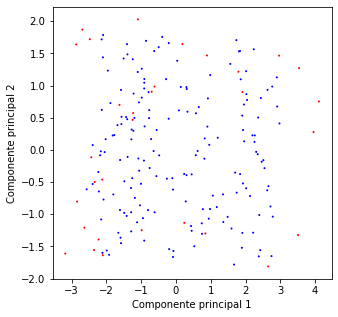

In [30]:
from sklearn.neighbors import LocalOutlierFactor

# precisamos indicar a fração de outliers, vamos estimar que seja 1%
FRACAO_OUTLIERS = 0.15

# precisamos também indicar o número de vizinhos que serão considerados
N_VIZINHOS = 50

CORES = np.array(["red", "blue"])

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

## Algoritmo Isolation Forest (IF)


In [31]:
from sklearn.ensemble import IsolationForest

CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = True # mude para True para ver a borda de previsão

# aqui que criamos o modelo de Isolation Forest
modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

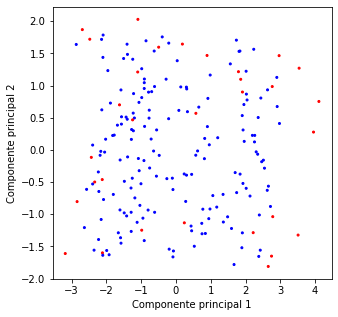

In [32]:
from sklearn.ensemble import IsolationForest

# precisamos indicar a fração de outliers, vamos estimar que seja 15%
FRACAO_OUTLIERS = 0.15

CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = True # mude para True para ver a borda de previsão

modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajustamos o modelo aos dados e realizamos a previsão
modelo_if.fit(X_pca)
previsao = modelo_if.predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=4,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

## Para remover os valores anômalos



In [33]:
logic = previsao == 1
X_clean = X[logic]

print(X.shape)
print(X_clean.shape)

(204, 5)
(173, 5)


Apesar dessa possibilidade, os valores anômalos são congruentes com a realidade, portanto, não devem ser removidos.